In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
import h5py
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
from skimage.segmentation import mark_boundaries
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input


In [10]:
im_shape = (224,224)
images = '/content/drive/MyDrive/Deep Learning/Database/32/Dataset COVID-19 Augmented'

seed = 10

BATCH_SIZE = 20

In [11]:
folders = os.listdir(images)
print(folders)

['Non-COVID-19', 'COVID-19']


In [12]:
data_generator = ImageDataGenerator( 
                              rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True
                            )
val_data_generator = ImageDataGenerator(rescale = 1./255,validation_split=0.3)

In [13]:
train_generator = data_generator.flow_from_directory(images, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(images, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 1824 images belonging to 2 classes.
Found 546 images belonging to 2 classes.
Classes: ['COVID-19', 'Non-COVID-19']


In [14]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D( 32, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 64,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 128,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(2, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])




model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 54, 54, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)       

In [15]:
hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 batch_size=32,
                 epochs = 40
                 
                )



Epoch 1/40
92/92 [==============================] - 159s 2s/step - loss: 0.5600 - accuracy: 0.6754 - val_loss: 0.2487 - val_accuracy: 0.9121
Epoch 2/40
92/92 [==============================] - 128s 1s/step - loss: 0.2571 - accuracy: 0.9019 - val_loss: 0.1922 - val_accuracy: 0.9194
Epoch 3/40
92/92 [==============================] - 128s 1s/step - loss: 0.1709 - accuracy: 0.9348 - val_loss: 0.1044 - val_accuracy: 0.9780
Epoch 4/40
92/92 [==============================] - 130s 1s/step - loss: 0.1273 - accuracy: 0.9529 - val_loss: 0.0818 - val_accuracy: 0.9799
Epoch 5/40
92/92 [==============================] - 130s 1s/step - loss: 0.1454 - accuracy: 0.9430 - val_loss: 0.1245 - val_accuracy: 0.9762
Epoch 6/40
92/92 [==============================] - 130s 1s/step - loss: 0.0910 - accuracy: 0.9698 - val_loss: 0.0648 - val_accuracy: 0.9835
Epoch 7/40
92/92 [==============================] - 130s 1s/step - loss: 0.1106 - accuracy: 0.9550 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 8/40
92

In [16]:
model.save('covid_model.h5')

In [17]:
print("training_accuracy", hist.history['accuracy'][-1])
print("validation_accuracy", hist.history['val_accuracy'][-1])

training_accuracy 0.9890350699424744
validation_accuracy 0.9963369965553284


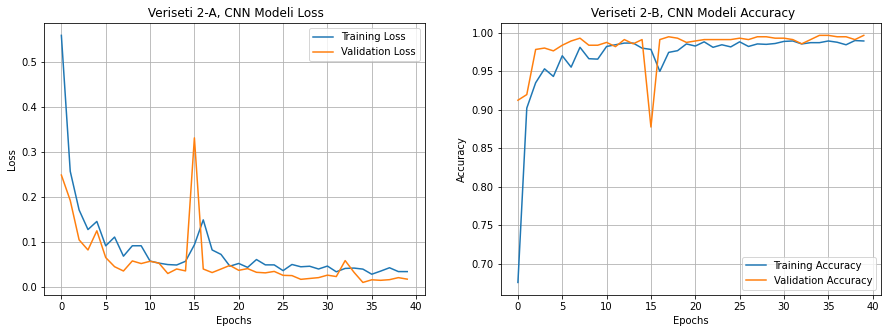

In [18]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.title(" Veriseti 2-A, CNN Modeli Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title(" Veriseti 2-B, CNN Modeli Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

28/28 [==============================] - 11s 375ms/step


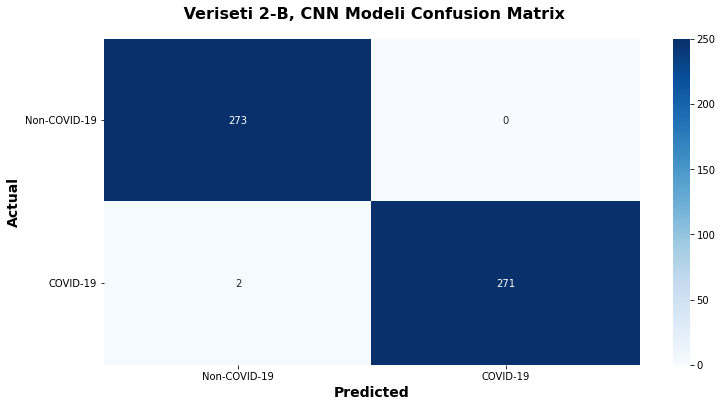

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef

classes = ['Non-COVID-19', 'COVID-19']

y_pred = model.predict(validation_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=validation_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title(' Veriseti 2-B, CNN Modeli Confusion Matrix',fontsize = 16,weight = 'bold',pad=20);

In [20]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       273
           1       1.00      0.99      1.00       273

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



In [21]:
print("2-B. Veriseti - CNN Modeli")
print('Precision: %.3f' % precision_score(y_true, predictions))
print('Recall: %.3f' % recall_score(y_true, predictions))
print('Accuracy: %.3f' % accuracy_score(y_true, predictions))
print('F1 Score: %.3f' % f1_score(y_true, predictions))
print('Positive Predictive Value (PPV) Score: %.3f' % precision_score(y_true, predictions))
print('Matthews correlation coefficient (MCC) Score: %.3f' % matthews_corrcoef(y_true, predictions))

2-B. Veriseti - CNN Modeli
Precision: 1.000
Recall: 0.993
Accuracy: 0.996
F1 Score: 0.996
Positive Predictive Value (PPV) Score: 1.000
Matthews correlation coefficient (MCC) Score: 0.993


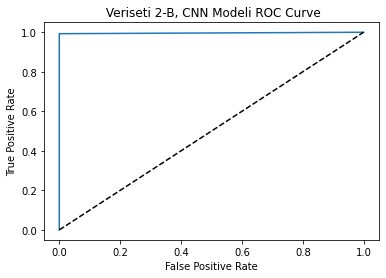

In [22]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_true, predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "k--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(" Veriseti 2-B, CNN Modeli ROC Curve")
plt.show()